In [1]:
def Spline(x: float, x0: float, pars: dict[str, float]) -> float:
    a = pars["a"]
    b = pars["b"]
    c = pars["c"]
    d = pars["d"]
    return a + b * (x - x0) + c * (x - x0) ** 2 + d * (x - x0) ** 3

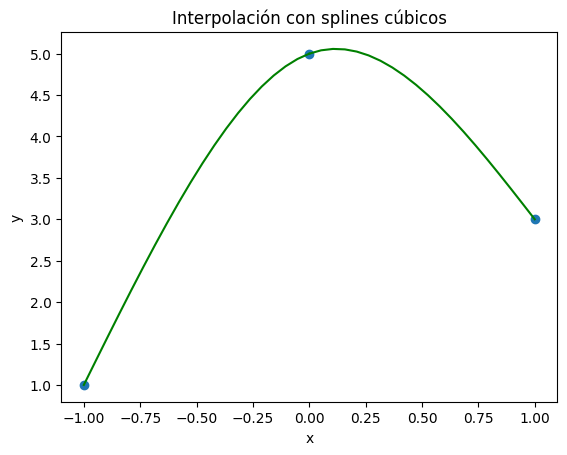

In [17]:
import matplotlib.pyplot as plt
import numpy as np

xs = [-1, 0, 1]
ys = [1, 5, 3]
s = [
    {"a": 1, "b": 5.5, "c": 0, "d": -1.5},
    {"a": 5, "b": 1, "c": -4.5, "d": 1.5},
]
for i, x_i in enumerate(xs[:-1]):
    _x = np.linspace(x_i, xs[i + 1], 20)
    _y = Spline(_x, x_i, s[i])
    plt.plot(_x, _y, color="green")

plt.scatter(xs, ys)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolación con splines cúbicos")
plt.show()

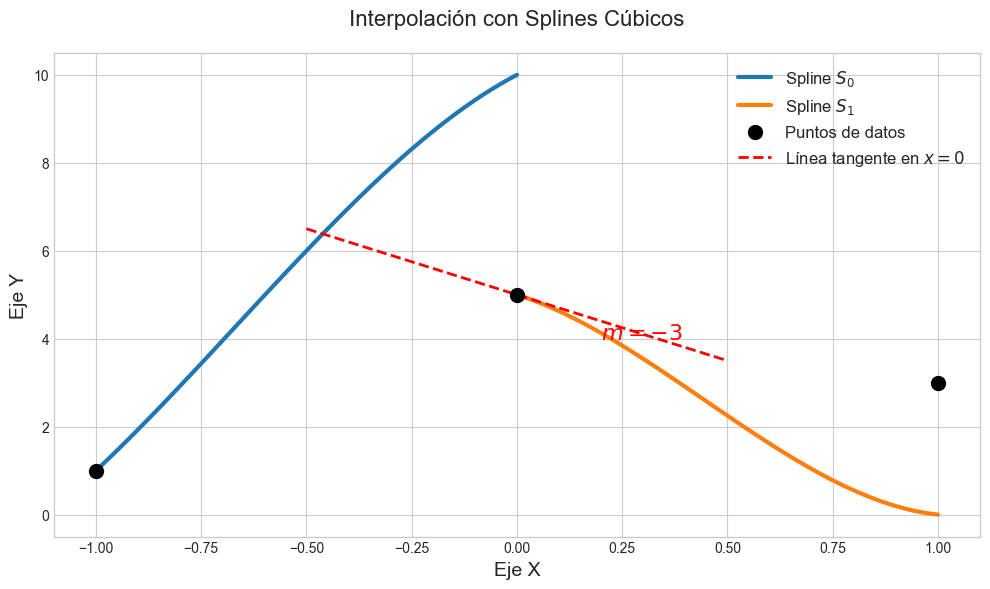

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def Spline(x: float, x0: float, pars: dict[str, float]) -> float:
    """Calcula el valor de un spline cúbico en un punto x."""
    a = pars["a"]
    b = pars["b"]
    c = pars["c"]
    d = pars["d"]
    return a + b * (x - x0) + c * (x - x0) ** 2 + d * (x - x0) ** 3

# Datos y parámetros del spline
xs = [-1, 0, 1]
ys = [1, 5, 3]
s = [
    {"a": 1, "b": 9, "c": 4, "d": -4},  # S0 para [-1, 0]
    {"a": 5, "b": -3, "c": -8, "d": 6},  # S1 para [0, 1]
]

# Configuración del gráfico
plt.style.use('seaborn-v0_8-whitegrid') # Un estilo más limpio
fig, ax = plt.subplots(figsize=(10, 6))

# Trazar los splines cúbicos
colors = ['#1f77b4', '#ff7f0e'] # Colores distintivos para cada spline
for i, x_i in enumerate(xs[:-1]):
    _x = np.linspace(x_i, xs[i + 1], 100) # Más puntos para una curva más suave
    _y = Spline(_x, x_i, s[i])
    ax.plot(_x, _y, color=colors[i], linewidth=3, label=f'Spline $S_{i}$')

# Trazar los puntos de datos originales
ax.scatter(xs, ys, color='black', zorder=5, s=100, label='Puntos de datos')

# Trazar la línea tangente
x_tan = np.linspace(-0.5, 0.5, 100)
y_tan = 5 + (-3) * (x_tan - 0)
ax.plot(x_tan, y_tan, '--', color='red', linewidth=2, label='Línea tangente en $x=0$')

# Añadir la etiqueta para la pendiente
ax.text(0.2, 4.0, r"$m = -3$", fontsize=16, color='red', style='italic', ha='left')

# Etiquetas y título
ax.set_xlabel("Eje X", fontsize=14)
ax.set_ylabel("Eje Y", fontsize=14)
ax.set_title("Interpolación con Splines Cúbicos", fontsize=16, pad=20)
ax.legend(fontsize=12)
ax.grid(True)

# Mostrar el gráfico
plt.tight_layout() # Ajusta el diseño para evitar superposiciones
plt.show()

In [2]:
xs = [-1, 0, 1]
s = [
    {"a": 1, "b": 9, "c": 4, "d": -4},     
    {"a": 5, "b": -3, "c": -8, "d": 6},   
]
print("S0(x) = {:.3f} × (x - {})^3 + {:.3f} × (x - {})^2 + {:.3f} × (x - {}) + {:.3f}".format(
    s[0]["d"], xs[0], s[0]["c"], xs[0], s[0]["b"], xs[0], s[0]["a"]
))

print("S1(x) = {:.3f} × (x - {})^3 + {:.3f} × (x - {})^2 + {:.3f} × (x - {}) + {:.3f}".format(
    s[1]["d"], xs[1], s[1]["c"], xs[1], s[1]["b"], xs[1], s[1]["a"]
))

S0(x) = -4.000 × (x - -1)^3 + 4.000 × (x - -1)^2 + 9.000 × (x - -1) + 1.000
S1(x) = 6.000 × (x - 0)^3 + -8.000 × (x - 0)^2 + -3.000 × (x - 0) + 5.000
